In [1]:
import os.path as op
import sys
sys.path.append(op.abspath('../'))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import models
import var, fcts

from project import files, defs, col
from lib import data, plot as lp, bdt as lBDT

In [3]:
N = 100000
S = 100000
P = 100000


shift_pedestal = (600, 150)
amp_S = 30  # (25, 5)
std_N = 1.

# Peaked
n_peaks = (1, 6)  # between 1 and 6 peaks / event
amp_P = (1, 30)  # peak amplitude between 1 and 15
length_peaks = (1, 3)  # length of a peak between 1 and 3

shift_pedestal = (600, 150)

optimised = False

components = {
    "S": {"S": S, "amp_S": amp_S},
    "N": {"N": N, "std_N": std_N},
    "P": {
        "P": P, "n_peaks": n_peaks,
        "amp_P": amp_P, "length_peaks": length_peaks
    }
}

bdt_name = "BDT_SNP"

image_path = op.join(var.image_path, bdt_name)

In [4]:
rng = np.random.default_rng(12345)

dataframe = models.get_full_dataframe(
    components,
    shift_pedestal=shift_pedestal,
    random_time_shift=True,
    rng=rng
)

dataframe = files.compute_voi(
    dataframe,
    variables=defs.computed_variables +
    ['lower_than_mean_cons', 'larger_than_mean_cons',
     'std_pos', 'std_neg', 'nb_pos', 'nb_neg']
)


Time taken: 4.043883562088013


In [5]:
columns_already_computed = [
    'pos_max', 'pos_min',
    'std',
    'lower_than_mean_cons', 'larger_than_mean_cons',
    'std_pos', 'std_neg',
    'nb_pos', 'nb_neg',
]

columns_to_compute = [
    'max_m_mean', 'min_m_mean', 'pos_max_m_pos_min',
    'mean_m_pedestal',
    'median_m_mean', 'mean_m_std_m_pedestal',
    'std_pos_m_std_neg',
    'nb_pos_m_nb_neg',
    'min_m_pedestal',
    'max_m_pedestal',
    'min_std_pos_neg',
    'max_std_pos_neg',
    'max_std_pos_neg_m_min_std_pos_neg',
    'min_std_pos_neg_red',
    'mean_m_pedestal_red',
    'max_std_pos_neg_red',
    'max_m_mean_red',
    'max_m_pedestal_red',
]


# Get the formula of the columns to compute
formula_columns = col.get_formula_columns(columns_to_compute)
formula_column_labels = col.get_formula_labels(
    columns_to_compute, defs.column_labels
)
column_labels = {**defs.column_labels, **formula_column_labels}

# Compute them
dataframe = data.compute_vals(dataframe, formula_columns)


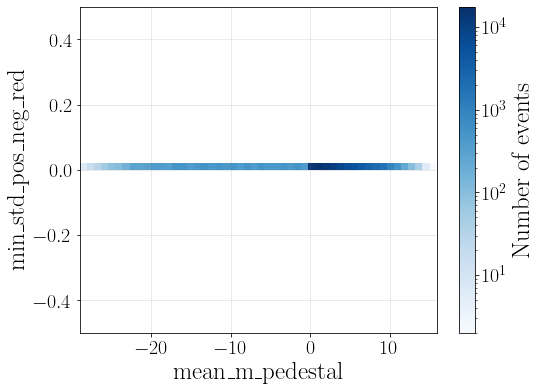

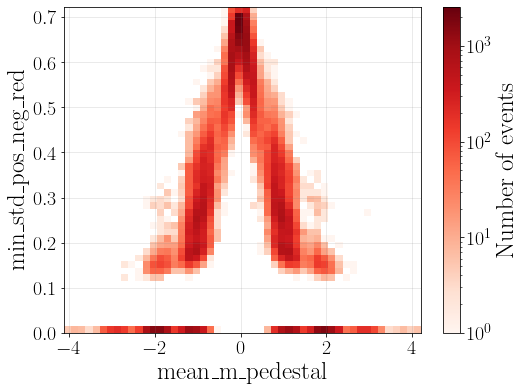

In [25]:

cats = ["S", "P", "N"]
colormap_cats = {"S" : "Greens", "P" : "Blues", "N" : "Reds"}


for i in range(len(cats)):
    fig, ax = plt.subplots(figsize=(8, 6))
    dataframe_cat = dataframe.query(
        f"{models.dict_df_flags[cats[i]]}==True"
    )
    
    lp.plot_hist2d(
        dataframe_cat["mean_m_pedestal"],
        dataframe_cat["min_std_pos_neg_red"],
        "mean_m_pedestal",
        "min_std_pos_neg_red",
        ax=ax,
        fig=fig,
        logscale=True,
        cmap=colormap_cats[cats[i]]
    )
